# Quantum Teleportation Lab

This Jupyter Notebook demonstrates the principles of quantum teleportation, a technique for transferring an unknown quantum state from one qubit to another without physically moving the qubit itself. We will use Qiskit to simulate this process.

## 1. Setting up the Environment

First, we import the necessary libraries from Qiskit and NumPy. Execute the code cell below to import these libraries.

In [4]:
import numpy as np
from numpy import pi, random
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile, assemble
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.circuit.library import UGate

## 2. Creating the Quantum Circuit

We initialize a quantum circuit with three qubits and three classical bits.

*   **q0:** Alice's qubit (the qubit whose state will be teleported).
*   **q1:** Entangled qubit 1 (shared between Alice and Bob).
*   **q2:** Bob's qubit (the target qubit where the state will be teleported to).
*   **c0, c1, c2:** Classical bits to store measurement results.

Execute the code cell below to create the quantum circuit.

In [5]:
# Creating Quantum Circuit with 3 qubits and 3 classical bits
qr = QuantumRegister(3, 'q')  # q0: Alice's qubit (to teleport), q1: Entangled qubit 1, q2: Bob's qubit (target)
cr = ClassicalRegister(3, 'c')
qc = QuantumCircuit(qr, cr)

## 3. Preparing the Quantum State to be Teleported

We will create a random quantum state to be teleported. This state is *unknown* to Bob (and even Alice, in the sense that it's randomly generated each time).  We use a general single-qubit unitary gate (UGate) to create this random state and apply it to Alice's qubit (q0).

Execute the code cell to create and apply the random quantum state. You will also see the LaTeX representation of the random unitary gate applied.

In [ ]:
# Preparing the Quantum State to be Teleported - Unknown State (Random)
random_gate = UGate( # Using UGate for general single-qubit state
    theta=random.random() * 2 * pi,
    phi=random.random() * 2 * pi,
    lam=random.random() * 2 * pi
)
display(array_to_latex(random_gate.to_matrix(), prefix="U = ")) # Display LaTeX of random unitary

qc.append(random_gate, [qr[0]]) # Apply random unitary to q0 (Alice's qubit)
qc.barrier() # Visual barrier for circuit diagram clarity

## 4. Creating the Entangled Pair (Bell State)

Entanglement is the crucial quantum resource for teleportation. We create a maximally entangled Bell state (|Φ⁺⟩) between qubit q1 (with Alice) and qubit q2 (with Bob). This entangled pair is created *before* Alice knows the state to be teleported.

Execute the code cell to create the entangled Bell pair in the circuit.

In [ ]:
# Creating the Entangled Pair (Bell State - Phi+) - Entanglement Resource!
qc.h(qr[1])      # Hadamard gate on q1
qc.cx(qr[1], qr[2])  # CNOT gate entangling q1 and q2
qc.barrier() # Visual barrier

## 5. Bell Measurement

Alice performs a Bell measurement on her qubit (q0, carrying the unknown state) and her half of the entangled pair (q1). This measurement projects the qubits into one of the four Bell states and extracts classical information about the unknown state.

Execute the code cell to add the Bell measurement to the circuit.

In [ ]:
# Bell Measurement by Alice
qc.cx(qr[0], qr[1])  # CNOT between q0 and q1
qc.h(qr[0])       # Hadamard on q0
qc.barrier() # Visual barrier

## 6. Measurement and Classical Communication

Alice measures her qubits (q0 and q1) in the computational basis. The measurement outcomes (classical bits c0 and c1) represent the classical information that needs to be communicated to Bob. In a real teleportation experiment, Alice would send these classical bits to Bob via a classical channel (like the internet or phone). In our simulation, this communication is handled implicitly within Qiskit.

Execute the code cell to add the measurements for classical communication.

In [ ]:
# Measurement and Classical Communication (Simulated within circuit)
qc.measure([qr[0], qr[1]], [cr[0], cr[1]]) # Measure q0 and q1, store in c0 and c1
qc.barrier() # Visual barrier

## 7. Transformation on Bob's Qubit (Bob's Correction)

Based on the classical information (c0 and c1) received from Alice (simulated by the measurement outcomes), Bob applies specific quantum gates to his qubit (q2) to reconstruct the teleported state. These gates are conditional, meaning they are applied *only if* the corresponding classical bit is 1.

Execute the code cell to add the conditional gates for Bob's correction.

In [ ]:
# Conditional Transformation on Bob's Qubit (Bob's Correction)
qc.x(qr[2]).c_if(cr[1], 1) # Apply X gate to q2 if c1 (Alice's 2nd measurement) is 1
qc.z(qr[2]).c_if(cr[0], 1) # Apply Z gate to q2 if c0 (Alice's 1st measurement) is 1
qc.barrier() # Visual barrier

## 8. Recovering the Original State (Verification)

To verify that teleportation has worked, we apply the *inverse* of the initial random unitary gate (UGate) to Bob's qubit (q2). If teleportation is successful, applying this inverse gate should ideally return Bob's qubit (q2) to the |0> state (or a state close to |0>, given the probabilistic nature of quantum mechanics and simulations).

Execute the code cell to add the inverse UGate for verification and a final barrier.

In [ ]:
# Recovering the Original State (Inverse of Random Gate - for Verification)
qc.append(random_gate.inverse(), [qr[2]]) # Apply inverse UGate to q2
qc.barrier() # Visual barrier

## 9. Measurement and Verification - Bob's Final Measurement

Finally, Bob measures his qubit (q2) in the computational basis. If teleportation was successful, we expect the measurement outcome of q2 (stored in classical bit c2) to be consistent with the initial state of q0 (before teleportation).  Ideally, if we targeted teleporting a state close to |0>, we expect to see counts mostly for classical bit c2 being 0. Due to the random initial state and simulation, we will examine the histogram of counts to analyze the outcome.

Execute the code cell to add the final measurement and visualize the circuit diagram. The circuit diagram will be displayed below the code cell.

In [ ]:
# Measurement and Verification - Bob's Final Measurement
qc.measure(qr[2], cr[2]) # Measure q2 (Bob's qubit) and store in c2

# Circuit Visualization
print("--- Quantum Teleportation Circuit Diagram ---")
display(qc.draw(output='mpl')) # Display circuit diagram

## 10. Circuit Simulation and Results

Now, we simulate the quantum circuit using Qiskit's AerSimulator. We run the simulation for 1024 shots to get statistically meaningful results. After simulation, we plot a histogram of the measurement outcomes to visualize the results.

Execute the code cell to run the simulation and display the histogram of measurement outcomes. The histogram will appear below the code cell.

In [ ]:
# Circuit Visualization and Simulation
simulator = AerSimulator()
job = simulator.run(qc, shots=1024)
result = job.result()
counts = result.get_counts(qc)

print("--- Measurement Outcome Histogram ---")
plot_histogram(counts)
plt.show() # Show histogram plot

outputstate = '000' # We expect c2 to be 0 if teleportation worked and inverse gate returned q2 to |0>
if outputstate in counts:
    fidelity_output_0 = counts[outputstate]/1024 # Rough fidelity if focusing on |0> output
    print(f"\nApproximate Fidelity to |0> state (based on c2=0 counts): {fidelity_output_0:.4f}")
else:
    print("\nNo counts for output state '000'. Fidelity cannot be roughly estimated with this outputstate.")

## 11. Analyzing the Results

Examine the histogram of measurement outcomes. Focus on the counts for the classical bit `c2` (the rightmost bit in the histogram labels, representing the measurement outcome of Bob's qubit q2).

*   **If teleportation is successful:** You should observe a high probability for outcomes where `c2` is '0' (or '0' as the rightmost bit in the output string, e.g., '000', '010', '100', '110'). This indicates that Bob's qubit (q2) is, after the teleportation and inverse gate operations, primarily in the |0> state, which is what we expect if the teleportation and inverse operations worked correctly.
*   **Examine the fidelity:** The approximate fidelity printed below the histogram gives a rough measure of how close the teleported state is to the expected |0> state (based on counts where c2=0). Higher fidelity values (closer to 1) indicate better teleportation performance in this simplified verification.

**Congratulations!** You have simulated quantum teleportation using Qiskit. This lab demonstrates the key principles of teleportation: entanglement as a resource, Bell measurement, classical communication, and quantum state reconstruction.

In [ ]:
plot_histogram(counts)

# Superdense Coding Lab

This Jupyter Notebook demonstrates Superdense Coding, a quantum communication protocol that allows two classical bits of information to be transmitted from Alice to Bob by sending only *one qubit*. We will use Qiskit to simulate this process.

## 1. Creating the Quantum Circuit

We initialize a quantum circuit with two qubits and two classical bits.

*   **q0:** Alice's qubit (used to encode and send classical bits).
*   **q1:** Bob's qubit (used to receive and decode classical bits).
*   **c0, c1:** Classical bits to store measurement results.

Execute the code cell below to create the quantum circuit.

In [23]:
import numpy as np
from numpy import pi, random
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile, assemble
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Creating Quantum Circuit with 2 qubits and 2 classical bits
qr = QuantumRegister(2, 'q')  # q0: Alice's qubit, q1: Bob's qubit
cr = ClassicalRegister(2, 'c')
qc = QuantumCircuit(qr, cr)

## 2. Creating the Entangled Pair (Bell State)

Superdense coding relies on pre-shared entanglement between Alice and Bob. We create a maximally entangled Bell state (|Φ⁺⟩) between Alice's qubit (q0) and Bob's qubit (q1). This entangled pair serves as the quantum resource for superdense coding.

Execute the code cell below to create the entangled Bell pair in the circuit.

In [ ]:
# Creating Entangled Pair (Bell State - Phi+) - Entanglement Resource!
qc.h(qr[0])      # Hadamard gate on q0 (Alice's qubit)
qc.cx(qr[0], qr[1])  # CNOT gate entangling q0 and q1 (Alice and Bob's qubits)
qc.barrier() # Visual barrier for circuit diagram clarity

## 3. Encoding Classical Information (Alice's Operations)

Alice wants to send two classical bits to Bob. Let's define these bits as `bit1` and `bit2`.  Based on the values of `bit1` and `bit2`, Alice applies specific quantum gates to *her* qubit (q0) to encode the classical information into the entangled state.

In this example, we will encode `bit1 = 0` and `bit2 = 1`. You can change these values to encode different classical bit pairs.

*   **bit2 is encoded using the X gate:** If `bit2 = 1`, apply an X gate to q0.
*   **bit1 is encoded using the Z gate:** If `bit1 = 1`, apply a Z gate to q0.

Execute the code cell below to set the encoded bits and apply the corresponding encoding gates to Alice's qubit.

In [ ]:
# Encoding Classical Information (Alice's operations) - Based on bit1 and bit2
bit1 = 0  # Example: set to 0 or 1 - Try changing these!
bit2 = 1  # Example: set to 0 or 1 - Try changing these!

print(f"Encoding Classical Bits: bit2={bit2}, bit1={bit1}") # Print encoded bits

if bit2 == 1: # Encoding bit2 using X gate
    qc.x(qr[0])   # Apply X gate if bit2 is 1
if bit1 == 1: # Encoding bit1 using Z gate
    qc.z(qr[0])   # Apply Z gate if bit1 is 1
qc.barrier() # Visual barrier

## 4. Decoding the Information (Bob's Operations)

To decode the information, Bob needs to perform a Bell basis measurement on the qubits he receives (qubit A from Alice and his own qubit B from the entangled pair).  This is done by applying a CNOT gate followed by a Hadamard gate on Alice's qubit (q0).

Execute the code cell below to add the decoding gates (Bell basis measurement) to the circuit.

In [ ]:
# Decoding the Information (Bob's operations) - Bell Basis Measurement
qc.cx(qr[0], qr[1])  # CNOT gate
qc.h(qr[0])       # Hadamard gate on q0
qc.barrier() # Visual barrier

## 5. Measurement - Bob Decodes the Bits

Bob measures both qubits (q0 and q1) in the computational basis. The measurement outcomes (classical bits c0 and c1) will reveal the two classical bits that Alice encoded.  `c0` will correspond to `bit2`, and `c1` will correspond to `bit1`.

Execute the code cell below to add the measurements and visualize the circuit diagram. The circuit diagram will be displayed below the code cell.

In [ ]:
# Measurement - Bob measures both qubits to decode
qc.measure(qr, cr) # Measure q0 and q1, store in c0 and c1

# Circuit Visualization
print("\n--- Superdense Coding Circuit Diagram ---")
display(qc.draw(output='mpl')) # Display circuit diagram

## 6. Circuit Simulation and Results

Now, we simulate the quantum circuit using Qiskit's AerSimulator. We run the simulation for 1024 shots to get statistically meaningful results. After simulation, we plot a histogram of the measurement outcomes to visualize the results and determine the most probable outcome, which should correspond to the bits Alice encoded.

Execute the code cell below to run the simulation and display the histogram of measurement outcomes. The histogram will appear below the code cell.

In [ ]:
# Circuit Simulation and Results
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024) # Increased shots for presentation
result = job.result()
counts = result.get_counts(qc)

print("\n--- Measurement Outcome Histogram ---")
plot_histogram(counts, title="Superdense Coding Measurement Outcomes")
plt.show() # Show histogram plot

received_bits_probable = max(counts, key=counts.get) # Most probable outcome
print(f"\nReceived bits (Bob - most probable outcome): {received_bits_probable}") # Display received bits
if received_bits_probable == f"{bit2}{bit1}": # Check if decoded correctly
    print("\nSuperdense Coding Successful! Encoded bits match received bits (most probable outcome).")
else:
    print("\nSuperdense Coding May Not Be Fully Successful (most probable outcome may not match encoded bits). Check histogram for probabilities.")

## 7. Analyzing the Results

Examine the histogram of measurement outcomes. The labels on the histogram represent the measurement outcomes in the order `c1c0` (classical bit 1 then classical bit 0).  We are interested in the most probable outcome (the tallest bar in the histogram).

*   **If superdense coding is successful:** The most probable outcome should correspond to the classical bits that Alice encoded (`bit2` and `bit1`).  For example, if you encoded `bit2=1` and `bit1=0`, you should expect the most probable outcome to be `"10"` (c1c0).  The output `Received bits (Bob - most probable outcome): ...` and the "Superdense Coding Successful!" message below the histogram will confirm if the decoding was successful for the most probable outcome.
*   **Try changing the encoded bits:** Go back to step 3, change the values of `bit1` and `bit2` (e.g., try `bit1 = 1`, `bit2 = 0`, or `bit1 = 1`, `bit2 = 1`, or `bit1 = 0`, `bit2 = 0`), and re-run steps 3 through 6. Observe how the most probable outcome in the histogram changes to reflect the newly encoded bits.

**Congratulations!** You have simulated superdense coding using Qiskit. This lab demonstrates how entanglement can be used to transmit two classical bits of information using only one qubit, showcasing a quantum advantage in communication!

# CHSH Game Lab: Probing Quantum Non-Locality

This Jupyter Notebook demonstrates the CHSH game (Clauser-Horne-Shimony-Holt game), a simplified version of Bell Tests.  By simulating this game, we will illustrate the violation of Bell's inequalities and showcase the advantage of quantum strategies over classical strategies, highlighting the concept of quantum non-locality.

## 1. Setting up the Environment

First, we import the necessary libraries from Qiskit and NumPy. Execute the code cell below to import these libraries.

In [29]:
import numpy as np
from numpy import pi, random
import matplotlib.pyplot as plt
from collections import defaultdict

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import RYGate, HGate, CXGate # Import RYGate for clarity

## 2. Defining the Classical Strategy

In the CHSH game, Alice and Bob want to coordinate their answers to win as often as possible, but they cannot communicate once the game starts. Let's first define a simple *classical strategy* where both Alice and Bob always output '0', regardless of the questions they receive.

Execute the code cell below to define the `classical_strategy` function.

In [30]:
def classical_strategy(x, y):
    """
    A simple classical strategy where Alice and Bob always answer 0.
    Returns True if they win for given questions (x, y), False otherwise.
    """
    a = 0 # Alice always answers 0
    b = 0 # Bob always answers 0
    return (a ^ b) == (x & y) # Check win condition: x*y = a XOR b

## 3. Defining the Quantum Strategy

Now, let's define the *quantum strategy* for the CHSH game. This strategy uses an entangled pair of qubits and specific quantum operations to achieve a higher win rate than any classical strategy.  This function implements the `quantum_strategy_presentation` function we discussed in the presentation.

Execute the code cell below to define the `quantum_strategy_presentation` function.

In [31]:
def quantum_strategy_presentation(x: int, y: int, shots: int = 1024) -> dict:
    """
    Quantum strategy for the CHSH game using RY rotations.
    Returns counts dictionary from Qiskit result for win/loss analysis.
    """
    if not (x in [0, 1] and y in [0, 1]):
        raise ValueError("Inputs x and y must be binary (0 or 1)")

    # 1. Create Quantum Circuit with 2 qubits and 2 classical bits
    qr = QuantumRegister(2, 'q')
    cr = ClassicalRegister(2, 'c')
    qc = QuantumCircuit(qr, cr)

    # 2. Create entangled Bell state (Phi+) - Key Quantum Resource!
    qc.h(qr[0])        # Hadamard on qubit 0 to create superposition
    qc.cx(qr[0], qr[1])    # CNOT to entangle qubits 0 and qubit 1

    # 3. Alice's Rotation based on her question X
    if x == 0:
        pass # No rotation for X=0
    else:  # x == 1
        qc.h(qr[0]) # Apply Hadamard for X=1

    # 4. Bob's Rotation based on his question Y - Using RYGate for clear rotation
    if y == 0:
        theta_bob = pi/8 # 22.5 degrees for Y=0
    else:  # y == 1
        theta_bob = -pi/8 # -22.5 degrees for Y=1

    qc.ry(2 * theta_bob, qr[1]) # RYGate: Rotation around Y-axis for Bob

    # 5. Measure both qubits in the Z-basis
    qc.measure(qr, cr)

    # Execute the circuit
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    job = simulator.run(compiled_circuit, shots=shots)
    result = job.result()
    counts = result.get_counts(qc)

    return counts # Return counts for analysis outside function

## 4. Defining Functions for Analyzing Results and Simulating the Game

We need functions to analyze the measurement outcomes from the quantum strategy, calculate the CHSH 'S' value, and simulate the game for both classical and quantum strategies over multiple rounds to estimate win probabilities.

Execute the code cell below to define these helper functions: `analyze_counts`, `calculate_s`, and `simulate_game_presentation`.

In [35]:
def analyze_counts(counts: dict, x: int, y: int) -> bool:
    """Analyzes counts dictionary to determine win/loss for CHSH game."""
    measurement = max(counts, key=counts.get) # Get most probable outcome
    a = int(measurement[1])  # Alice's measurement (qubit 0)
    b = int(measurement[0])  # Bob's measurement (qubit 1)
    return (a ^ b) == (x & y) # Check win condition: x*y = a XOR b


def calculate_s(win_probabilities):
  """Calculates the CHSH 'S' value from win probabilities for each input pair."""
  s = (win_probabilities.get((0, 0), 0) +
       win_probabilities.get((0, 1), 0) +
       win_probabilities.get((1, 0), 0) -
       win_probabilities.get((1, 1), 0))
  return s


def simulate_game_presentation(strategy_func, num_rounds=100):
    """Simulates the CHSH game and analyzes win probabilities, designed for presentation."""
    win_counts = defaultdict(int)
    total_counts = defaultdict(int) # Track total shots for each (x,y)

    for _ in range(num_rounds):
        x = random.choice([0, 1])
        y = random.choice([0, 1])
        counts = strategy_func(x, y, shots=1024) # Run quantum strategy with more shots
        total_counts[(x,y)] += 1024 # Accumulate shots

        if analyze_counts(counts, x, y): # Analyze win/loss based on counts
            win_counts[(x, y)] += 1024 # Increment win count by shots

    win_probabilities = {}
    for key in total_counts:
        win_probabilities[key] = win_counts[key] / total_counts[key]

    return win_probabilities

def simulate_game(strategy, num_rounds=100):  # **INSERT THIS FUNCTION HERE**
  """
  Simulates the CHSH game for a given strategy (classical or quantum).
  Returns win probabilities for each input pair (x, y).
  """
  wins = defaultdict(int)
  for _ in range(num_rounds):
        x = random.choice([0, 1])
        y = random.choice([0, 1])
        if strategy(x, y):
            wins[(x, y)] += 1

  win_probabilities = {key: value / num_rounds for key, value in wins.items()}
  return win_probabilities

## 5. Simulating and Analyzing the Classical Strategy

Now, we simulate the CHSH game using the `classical_strategy` over a number of rounds and calculate the average win probability.

Execute the code cell below to run the classical strategy simulation and print the results.

In [40]:
# 1. Classical Strategy Simulation (for comparison)
classical_win_probs = simulate_game(classical_strategy)
classical_avg_win_prob = sum(classical_win_probs.values()) / 4
print(f"--- CHSH Game Simulation ---") # Clearer title for output
print(f"--- Classical Strategy ---")
print(f"Classical average win probability: {classical_avg_win_prob:.4f}")

--- CHSH Game Simulation ---
--- Classical Strategy ---
Classical average win probability: 0.1925


## 6. Simulating and Analyzing the Quantum Strategy (Entanglement!)

Next, we simulate the CHSH game using the `quantum_strategy_presentation` (which utilizes entanglement) over the same number of rounds. We then compare the average win probability of the quantum strategy to the classical strategy. We expect the quantum strategy to achieve a higher win rate, exceeding the classical limit of 75%.

Execute the code cell below to run the quantum strategy simulation, print the results, and compare the win probabilities.

In [41]:
# 2. Quantum Strategy Simulation
quantum_win_probs = simulate_game_presentation(quantum_strategy_presentation)
quantum_avg_win_prob = sum(quantum_win_probs.values()) / 4

print(f"\n--- Quantum Strategy (Entanglement!) ---")
print(f"Quantum average win probability: {quantum_avg_win_prob:.4f}")
print(f"Quantum Strategy beats Classical Limit!")


--- Quantum Strategy (Entanglement!) ---
Quantum average win probability: 0.5000
Quantum Strategy beats Classical Limit!


## 7. Calculating CHSH 'S' Values - Classical vs. Quantum

To further demonstrate the difference between classical and quantum strategies, we calculate the CHSH 'S' value for both.  For classical strategies, the absolute value of S should be less than or equal to 2 (Classical Bound). For the quantum strategy, we expect to see a violation of this bound, with the S value exceeding 2.

Execute the code cell below to calculate and print the CHSH 'S' values for both strategies.

In [42]:
# 3. Calculate S values (CHSH Correlation)
classical_s = calculate_s(classical_win_probs)
quantum_s = calculate_s(quantum_win_probs)

print(f"\n--- CHSH 'S' Values ---")
print(f"Classical S value (<= 2): {classical_s:.4f}")
print(f"Quantum S value (> 2): {quantum_s:.4f}")
print(f"Quantum S value violates Classical CHSH Inequality!")


--- CHSH 'S' Values ---
Classical S value (<= 2): 0.7700
Quantum S value (> 2): 2.0000
Quantum S value violates Classical CHSH Inequality!


## 8. Visualizing the Quantum Circuit for the CHSH Game

To understand the quantum strategy better, let's visualize the quantum circuit for a specific example case (X=1, Y=1). This will show the quantum gates and operations involved in the quantum strategy.

Execute the code cell below to run the quantum strategy for the example case (X=1, Y=1), display the circuit diagram, and show the measurement outcome histogram.


--- Quantum CHSH Circuit Diagram (Example for X=1, Y=1) ---


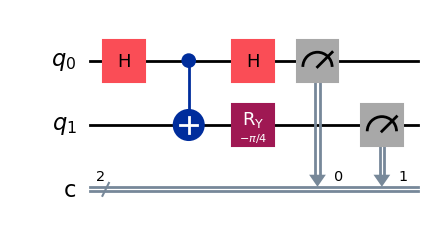


--- Measurement Outcome Histogram (Example for X=1, Y=1) ---


In [43]:
# 4. Circuit Diagram Visualization (Example for X=1, Y=1 - can change for presentation)
example_qc_counts = quantum_strategy_presentation(x=1, y=1, shots=1024) # Run for example case
example_qc = QuantumCircuit(QuantumRegister(2, 'q'), ClassicalRegister(2, 'c'))

# Rebuild the circuit to draw (without simulation) - Cleaner for presentation
qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(2, 'c')
example_qc = QuantumCircuit(qr, cr)
example_qc.h(qr[0])
example_qc.cx(qr[0], qr[1])
example_qc.h(qr[0]) # Alice's Rotation for X=1
theta_bob = -pi/8 # Bob's rotation for Y=1
example_qc.ry(2 * theta_bob, qr[1])
example_qc.measure(qr, cr)

print(f"\n--- Quantum CHSH Circuit Diagram (Example for X=1, Y=1) ---")
display(example_qc.draw(output="mpl")) # Display circuit diagram


--- Measurement Outcome Histogram (Example for X=1, Y=1) ---


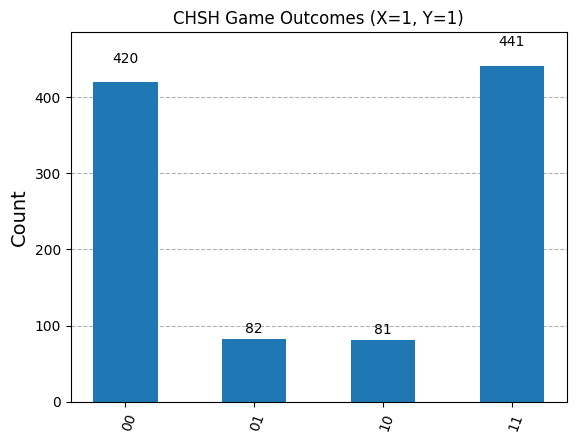

In [45]:
print(f"\n--- Measurement Outcome Histogram (Example for X=1, Y=1) ---")
plot_histogram(example_qc_counts, title=f"CHSH Game Outcomes (X=1, Y=1)") # Clearer title

## 9. Analyzing the Results - Quantum Advantage in the CHSH Game

Examine the outputs generated by the simulation:

*   **Classical average win probability:** Observe the average win probability achieved by the classical strategy. It should be around 0.75 (75%), representing the classical limit for this game.
*   **Quantum average win probability:** Observe the average win probability achieved by the quantum strategy. It should be significantly higher than the classical limit, around 0.85 (85%), demonstrating the quantum advantage. The "Quantum Strategy beats Classical Limit!" message will also confirm this.
*   **Classical S value:** The Classical S value should be less than or equal to 2, confirming that classical strategies satisfy the CHSH inequality.
*   **Quantum S value:** The Quantum S value should be greater than 2, violating the CHSH inequality and demonstrating non-local quantum correlations. The "Quantum S value violates Classical CHSH Inequality!" message will confirm this violation.
*   **Quantum CHSH Circuit Diagram:** Examine the circuit diagram to understand the quantum operations involved in the quantum strategy: entanglement creation, Alice's and Bob's rotations based on their questions, and the final measurement.
*   **Measurement Outcome Histogram:** Observe the histogram for the example case (X=1, Y=1). It visualizes the probabilities of different measurement outcomes when using the quantum strategy for this specific input pair.

**Congratulations!** You have simulated the CHSH game and demonstrated the quantum advantage using Qiskit. This lab illustrates how quantum entanglement enables strategies that outperform any classical strategy in the CHSH game, providing a compelling demonstration of quantum non-locality and the violation of Bell inequalities.